# 5.1. Künstliche neuronale Netwerke
>## <ins>Table of contents</ins> <a name="up"></a>[<sup>[1]</sup>](#cite_note-1)
>* [**5.1.1. Neuronen**](#5_1_1)
>* [**5.1.2. Neuronale Architekturen**](#5_1_2)
>* [**5.1.3. Aktivierungsfunktionen**](#5_1_3)
>* [**5.1.4. Backpropagation**](#5_1_4)
>* [**5.1.5. Praktische Probleme beim Lernen**](#5_1_5)
>
>## <ins>Beispiele</ins>
>* [**Beispiel 1**:Darstellung von AND-, OR- und XOR-Funktionen mit Perzeptronen](#b1)
>* [**Beispiel 2**: Backpropagation-Algorithmus$](#b2)
>* [**Beispiel 3**: Q-Learning des Staubsaugerproblems](#b3)

### Useful code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Definieren Sie die Funktionen
def hthresh(x):
    return np.where(x > 0, 1, 0)

def hid(x):
    return x

def hlogit(x):
    return round(1 / (1 + np.exp(-x)), 3)

def hrelu(x):
    return np.maximum(0, x)

def htanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def hsplus(x):
    return np.log(1 + np.exp(x))

def logit_cost(y, a):
    return -y * np.log(a) - (1 - y) * np.log(1 - a)

In [32]:
def multiply_matrix(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    print(result)
    if np.size(result) > 1:
        return result
    else: return [result]

In [1]:
matrix1= np.array([[2, -1, -1], 
                   [0, 1, -1]])
matrix2 = np.array([1,2,-1])
z1 = multiply_matrix(matrix1, matrix2)

NameError: name 'np' is not defined

In [34]:
a1 = list(map(hlogit, z1))
a1

[0.731, 0.953]

In [35]:
a1.insert(0, 1)
a1

[1, 0.731, 0.953]

In [36]:
matrix1= np.array([[3, -2, -1], 
                   [2, -1, 1]])
z2 = multiply_matrix(matrix1, np.array(a1))
a2 = list(map(hlogit, z2))
print(a2)
a2.insert(0, 1)
a2

[0.585 2.222]
[0.642, 0.902]


[1, 0.642, 0.902]

In [38]:
matrix1= np.array([1, 1, -3])
z3 = multiply_matrix(matrix1, np.array(a2))
a3 = list(map(hlogit, z3))
print(a3)

-1.064
[0.257]


In [ ]:
print(round(logit_cost(1, a3[0]), 3))  # Should print: 1.359

| Funktion | Formel | Ableitung | 
| --- | --- | --- |
| Schwellwertfunktion ($h^{thresh}$) | $$h^{thresh}(x) = \begin{cases} 1 & \text{falls } x > 0 \\ 0 & \text{sonst} \end{cases}$$ | Nicht definiert |
| Identitätsfunktion ($h^{id}$) | $$h^{id}(x) = x$$ | $$1$$ |
| Sigmoid-Funktion oder logistische Funktion ($h^{logit}$) | $$h^{logit}(x) = \frac{1}{1+e^{-x}}$$ | $$h^{logit}(x) \cdot (1 - h^{logit}(x))$$ |
| Rectified Linear Unit (ReLU, dt. Gleichrichter) ($h^{relu}$) | $$h^{relu}(x) = \max\{0, x\}$$ | $$\begin{cases} 1 & \text{falls } x > 0 \\ 0 & \text{sonst} \end{cases}$$ |
| Hyperbeltangens-Funktion ($h^{tanh}$) | $$h^{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$ | $$1 - (h^{tanh}(x))^2$$ |
| Softplus ($h^{splus}$) | $$h^{splus}(x) = \ln(1+e^x)$$ | $$h^{logit}(x)$$ |


## 5.1.0. Einleitung <a name="5_1_0"></a>
---

1. Ein **künstliches neuronales Netzwerk (ANN)** ist ein vielseitiges Modell für verschiedene Aufgaben des maschinellen Lernens.
2. Es ist <ins>an biologische neuronale Netzwerke angelehnt</ins> und besteht aus einer Anordnung von <ins>künstlichen Neuronen</ins>.
3. Jedes Neuron führt eine einfache mathematische Operation aus, basierend auf einer Reihe von Gewichten, um Eingaben zu verarbeiten.
4. Die moderne Forschung zu ANNs ist weitgehend unabhängig von der Forschung in Biologie und Kognitionswissenschaften.
5. ANNs <ins>werden als flexible Datenstruktur</ins> zur Repräsentation von Modellen für maschinelles Lernen betrachtet.
6. Der Begriff "neuronales Netzwerk" wird im Text oft verwendet, da sich dieser ausschließlich auf die künstliche Variante bezieht.
7. ANNs können für überwachtes und unüberwachtes Lernen sowie für das Reinforcement Learning verwendet werden.
8. Der Fokus liegt zunächst auf der Anwendung von ANNs für überwachtes Lernen.

> **Definition 1.** *künstliches neuronales Netzwerk (ANN)*
>
> Ein künstliches neuronales Netzwerk (ANN) ist ein mathematisches Modell, das aus einer Anordnung von künstlichen Neuronen besteht und zur Modellierung komplexer Zusammenhänge in Daten verwendet wird, insbesondere für Aufgaben des maschinellen Lernens.
>

## 5.1.1. Neuronen <a name="5_1_1"></a>
---

- Die Grundeinheit eines ANNs.

>**Definition 2.** *künstliches Neuron*
>
>Ein künstliches Neuron ist eine grundlegende Einheit eines künstlichen neuronalen Netzwerks, das Eingaben verarbeitet, eine mathematische Operation durchführt und das Ergebnis an nachfolgende Neuronen weitergibt oder als Gesamtergebnis des Netzwerks ausgibt.
>
>Formal heißt das:
>
>Sei $n \in \mathbb{N}$. Ein Neuron $r$ ist ein Tupel $r = (w, \text{act})$ mit $w \in \mathbb{R}^{n+1}$ und $\text{act} : \mathbb{R} \to \mathbb{R}$.



- Der Parameter $n$ ist die Länge der Eingabe für das Neuron $r = (w, \text{act})$.
- Der Vektor  $w = (w_0, w_1, \ldots, w_n)^T \in \mathbb{R}^{n+1}$ sind die Parameter von $r$.
- $\text{act}$ ist die Aktivierungsfunktion des Neurons.
- Die Aktivierungsfunktion bestimmt, wann die Eingabe eines Neurons ausreicht, um dieses zu aktivieren, d.h., einen relativ "hohen" Wert als Ausgabe zu produzieren.
- Ein einfaches Beispiel für eine Aktivierungsfunktion ist die Schwellwertfunktion $$h_{\text{thresh}}(x) = \begin{cases} 1 & \text{falls } x > 0 \\ 0 & \text{sonst} \end{cases}$$
- In der Praxis ist die Schwellwertfunktion $h_{\text{thresh}}$ keine sehr gute Aktivierungsfunktion. Dennoch dient sie als einfaches Beispiel, um den Begriff der Aktivierungsfunktion zu veranschaulichen. In Abschnitt 5.1.3 wird das Thema der Aktivierungsfunktionen genauer behandelt.

- Wenn $x = (x_1, ..., x_n) \in \mathbb{R}^n$ die Eingabe für $r$ ist, berechnet $r$ den Aktivierungswert $a_r$, definiert durch $$z_r = w_0 + w_1x_1 + ... + w_nx_n$$ und $$a_r = \text{act}(z_r)$$
- Der Zwischenwert $z_r$ wird auch als **linearer Anteil** von $r$ bezeichnet.
- Wenn $r = (w, \text{act})$, dann schreiben wir $$r_{w, \text{act}}(x) = \text{act}(w_0 + w_1x_1 + ... + w_nx_n)$$ für die gesamte Funktion, die von $r$ dargestellt wird. Eine schematische Darstellung eines Neurons ist in Abbildung 1 zu finden.
- Um die Notation zu vereinfachen, wird üblicherweise angenommen, dass jedes Neuron neben der Eingabe $x = (x_1, ..., x_n) \in \mathbb{R}^n$ noch einen zusätzlichen konstanten Eingabewert $x_0 = 1$ enthält.
- Wenn $x = (x_0, x_1, ..., x_n) \in \mathbb{R}^n$ mit $x_0 = 1$, dann gilt einfach $$z_r = w^T x = w_0x_0 + w_1x_1 + ... + w_nx_n$$ und $$a_r = \text{act}(z_r)$$

> Die zusätzliche Eingabe $x_0$ heißt **Bias-Eingabe**

![neuron](./neuron.PNG)

In [12]:
import numpy as np

# Define the activation function
def act(z):
    # This is an example of a threshold activation function
    return 1 if z > 0 else 0

# Define the neuron function
def neuron(w, x):
    # Compute the linear part
    #new_x = np.insert(x, 0, 1)
    z = np.dot(w, x)
    # Apply the activation function
    a = act(z)
    return a

# Parametervektor w
w = np.array([0.5, -0.2, 0.1])

# Eingabevektor x
x = np.array([1, 0.3, 0.8])

# Aufruf der Neuronenfunktion mit den Testdaten
output = neuron(w, x)

print("Das Ausgabe des Neurons ist:", output)


Das Ausgabe des Neurons ist: 1


- Ein einzelnes Neuron $r = (w, \text{act})$ kann bereits als einfaches Modell für das maschinelle Lernen verwendet werden.

- Sei $D = \{(x^{(1)}, y^{(1)}), ..., (x^{(m)}, y^{(m)})\}$ ein Trainingsdatensatz für ein überwachtes Lernproblem (*z.B. Regression oder Klassifikation*), und $L$ sei eine Kostenfunktion für das Lernproblem d.h. $L(D,f)$ gibt an wie gut eine Funktion $f: \mathbb{R}^n \to \mathbb{R}$ die Daten in $D$ repräsentieren kann.

  Das Ziel ist es, Parameter $\hat{w}$ zu finden, so dass $L(D, r_{\hat{w}, \text{act}})$ minimal ist. Die Funktion, die durch ein Neuron $r$ dargestellt wird, verallgemeinert bereits einige bekannte Modelle des maschinellen Lernens:
    1. Wenn $\text{act} = h^{id}$ die *Identitätsfunktion* ist und $L = L^{\text{qF}}$ der quadratische Fehler $$L_qF(D, f) = \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})^2$$, dann <ins>entspricht $r_{\hat{w}, \text{act}}$ der optimal angepassten linearen Funktion für die lineare Regression</ins>.
    
    2. Wenn $\text{act} = h^{\text{logit}}$ die *Sigmoid-Funktion* ist und $L = L^{\text{logit}}$ die *logistische Kostenfunktion* $$L_{\text{logit}}(D, f) = -\sum_{i=1}^{m} \left[ y^{(i)} \log f(x^{(i)}) + (1 - y^{(i)}) \log (1 - f(x^{(i)})) \right]$$, dann entspricht $r_{\hat{w}, \text{act}}$ dem optimalen Modell für die logistische Regression aus <ins>[Unterkapitel 2.2.](http://localhost:8888/lab/tree/KE2_ueberwachtes_Lernen/2_2_Logistische_Regression/2_2_logistische_regression.ipynb)</ins>.

- Durch Aneinanderreihung mehrerer Neuronen, wird die Ausdrucksstärke signifikant erhöht.
  
> **!!**
>
> Eine Support Vector Machine kann ebenfalls als einzelnes Neuron dargestellt werden, wobei die konkrete Aktivierungs- und Kostenfunktion je nach Implementierung variieren.

## 5.1.2. Neuronale Architekturen <a name="5_1_2"></a>
---

- Ein einzelnes Neuron kann bereits eine Reihe von klassischen Modellen des maschinellen Lernens darstellen.
- Eine einfache Architektur eines neuronalen Netzwerks mit einem einzelnen Neuron wurde bereits in den 1940/50er Jahren unter dem Namen **Perzeptron** entwickelt.
- Das Perzeptron verwendet die Schwellwertfunktion $h^{\text{thresh}}$ als Aktivierungsfunktion.
- In den ursprünglichen Arbeiten zum Perzeptron wurde die Kostenfunktion nicht explizit beschrieben, jedoch wird hier der quadratische Fehler $L_{\text{qF}}$ zu Demonstrationszwecken verwendet.
- **Das Problem mit dem Perzeptron**, das dazu führte, dass die Forschung zu neuronalen Netzen lange Zeit in Vergessenheit geriet, ist seine Unzulänglichkeit bei der Darstellung der relativ simplen XOR-Funktion.

#### **Beispiel 1.** <a name="b1"></a> Darstellung von AND-, OR- und XOR-Funktionen mit Perzeptronen

Wir betrachten zunächst das Problem der Darstellung der AND-Funktion, d.h., der Bool’schen Funktion
$$\text{AND} : \{0,1\} \times \{0,1\} \rightarrow \{0,1\}$$ 
definiert durch
$$\text{AND}(0,0) = \text{AND}(0,1) = \text{AND}(1,0) = 0$$
$$\text{AND}(1,1) = 1$$
Die AND-Funktion kann leicht mit einem Perzeptron implementiert werden, insbesondere gilt $\text{AND} = r_{(-1,1,1)^T ,h^{\text{thresh}}}$, siehe Abbildung 3. 



![neuron](./and.PNG)

In ähnlicher Weise kann die OR-Funktion durch $r_{(0,1,1)^T ,h^{\text{thresh}}}$ und die NEG-Funktion durch
$r_{(1, -1)^T ,h^{\text{thresh}}}$ dargestellt werden. 

Betrachten wir nun die XOR-Funktion definiert durch
$$\text{XOR}(0,0) = \text{XOR}(1,1) = 0$$
$$\text{XOR}(0,1) = \text{XOR}(1,0) = 1$$
Die XOR-Funktion kann nicht durch ein Perzeptron (oder jedes andere einzelne Neuron) dargestellt werden. Die
Leserin/der Leser ist eingeladen, sich von diesem Umstand selbst zu überzeugen.

>Ein **Perzeptron** ist ein einfacher Typ eines künstlichen Neurons, der eine lineare Trennung zwischen den Klassen in seinem Eingaberaum durchführt. Das bedeutet, dass ein Perzeptron nur Funktionen lernen kann, die linear trennbar sind. Die XOR-Funktion ist jedoch **nicht linear trennbar**. Wenn Sie die möglichen Eingaben und Ausgaben der XOR-Funktion in einem zweidimensionalen Raum darstellen (mit den Eingaben auf den Achsen und der Ausgabe als Farbe oder Symbol), werden Sie feststellen, dass es keine gerade Linie gibt, die die Punkte mit der Ausgabe 1 von den Punkten mit der Ausgabe 0 trennt.
>Daher kann ein einzelnes Perzeptron (oder jedes andere einzelne Neuron) die XOR-Funktion nicht darstellen. Sie benötigen ein Netzwerk aus Perzeptronen (oder Neuronen), um die XOR-Funktion zu modellieren. 

Da einzelne Perzeptronen die Bool’schen Operatoren AND, OR und NEG repräsentieren können und es leicht zu erkennen ist, dass
$$\text{XOR}(x_1, x_2) = \text{AND}(\text{OR}(x_1, x_2),\text{NEG}(\text{AND}(x_1, x_2)))$$

gilt, liegt es nahe, komplexe Funktionen wie XOR durch Aneinanderreihung von Neuronen der Basisfunktionen zu realisieren. Mit den obigen Erkenntnissen folgt auch direkt, dass

$$\text{XOR}(x_1, x_2) = r_{(-1,1,1)^T ,h^{\text{thresh}}} \left( r_{(0,1,1)^T ,h^{\text{thresh}}} (x_1, x_2),r_{(1,-1)^T ,h^{\text{thresh}}} \left( r_{(-1,1,1)^T ,h^{\text{thresh}}} (x_1, x_2) \right) \right)$$

gilt. Eine entsprechende schematische Darstellung des neuronalen Netzwerks ist in Abbildung 4 zu finden.

![neuron](./xor.PNG)

##### Feedforward-Netzwerk

- Ein neuronales Netzwerk wird üblicherweise in **Schichten** angeordnet, wobei jede Schicht die Ausgaben der vorherigen Schichten als Eingabe erhält und die Ausgabe an die nächste Schicht weiterleitet. Diese Art von Netzwerk wird als **Feedforward-Netzwerk** bezeichnet.

- Die allgemeine Struktur eines Feedforward-Netzwerks für eine Regressions- oder binäre Klassifikationsaufgabe ist in Abbildung 5 dargestellt.
![Feedforward-Netzwerk](./Feedforward-Netzwerk.PNG)

- Das Netzwerk besteht aus $l$ Schichten, wobei die Eingabeschicht (bestehend aus dem Eingabevektor $(x_0, x_1,..., x_n)$, inklusive dem
Bias-Neuron $x_0 = 1$) nicht gezählt wird. Die Ausgabeschicht hat einen Index $l$, und die Schichten mit den Indizes $1, ..., l-1$ werden als versteckte Schichten bezeichnet.
- Jede Schicht kann eine unterschiedliche Anzahl von Neuronen enthalten.
> z.B. in Abbildung 5 enthält die Eingabeschicht $n_0 = n + 1$ Eingabeneuronen (inklusive dem Bias-Neuron), die versteckte Schicht $k = 1,...,l − 1$ enthält $n_k$ Neuronen und die Ausgabeschicht ein Neuron.


- Zwischen jedem Paar von aufeinanderfolgenden Schichten $k-1$ und $k$ für $k = 1,...,l − 1$ gibt es eine Parametermatrix **Gewichtsmatrix**  $W^{(k-1)} \in \mathbb{R}^{n_k \times n_k -1} $, die die Parameter der Neuronen der $k$-ten Schicht enthält.

- Allgemein bezeichnet $W^{(x)}_{y,z}$ das Gewicht des z-ten Neurons der x-ten Schichten in der Berechnung des Wertes im y-ten Neuron der x+1-ten Schicht. Genauer, ist $x = (x_0, x_1,..., x_n)$ die Eingabe des Netzwerkes (mit $x_0 = 1$), so berechnen sich die Aktivierungswerte der ersten versteckten Schicht durch

$$a^{(1)}_i = \text{act}\left(W^{(0)}_{i,0} x_0 + W^{(0)}_{i,1} x_1 +...+ W^{(0)}_{i,n} x_n\right)$$

  für $i = 1,...,n_1$.

  Für $a^{(1)} = (a^{(1)}_1 ,...,a^{(1)}_{n_1}) \in \mathbb{R}^{n_1}$ schreiben wir dies verkürzt als

  $$a^{(1)} = \text{act}\left(W^{(0)}x\right)$$

  wobei die Anwendung der Aktivierungsfunktion act hierbei komponentenweise zu verstehen ist.

- Die Gesamtfunktion, die durch das Netzwerk dargestellt wird, kann als <ins>Komposition der Aktivierungsfunktionen und Gewichtsmatrizen geschrieben werden</ins>.

- Allgemein berechnen sich die Aktivierungswerte der k-ten Schicht aus den schon berechneten Werten der (k-1)-ten Schicht durch

$$a^{(k)} = \text{act}\left(W^{(k-1)}a^{(k-1)}\right)$$

für $k = 1,...,l$ (beachten Sie auch, dass die Bias-Neuronen stets auf den rechten Seiten zusätzlich hinzugefügt werden müss

n). Sei $W = \{W^{(0)},...,W^{(l-1)}\}$ die geordnete Menge aller Gewichtsmatrizen der einzelnen Schichten. Die insgesamt durch das Netzwerk in Abbildung 5 dargestellte Funktion $\phi_W(x)$ (also der Wert $a^{(l)}_1$ aus dem "Ausgabevektor" $a^{(l)} = (a^{(l)}_1)$ (bei Eingabe von x) kann also geschrieben werden als

$$\phi_W(x) = \text{act}\left(W^{(l-1)}\text{act}\left(W^{(l-2)} ... \text{act}\left(W^{(1)}\text{act}\left(W^{(0)}x\right)\right)\right)\right) \tag{1}$$


![abbildung6](./abbildung6.PNG)

In der obigen Darstellung haben wir implizit angenommen, dass die Aktivierungsfunktion act für alle Neuronen des Netzwerks identisch ist. Dies ist **nicht** notwendigerweise der Fall.

Üblicherweise haben Neuronen der inneren Schichten eine identische Aktivierungsfunktion, die Aktivierungsfunktion der Ausgabeschicht ist aber anwendungsabhängig uundü¨blicherweise nicht identisch mit denen der versteckten SchichtenU

- Ein neuronales Netzwerk mit nur einer versteckten Schicht kann jede beliebige Funktion beliebig genau approximieren, vorausgesetzt die verwendeten Aktivierungsfunktionen <ins>sind nicht-linear</ins>.
- Tiefe Netzwerke, die aus mindestens zwei versteckten Schichten bestehen, bilden die Grundlage für moderne Deep-Learning-Techniken.
- Durch die Aufteilung einer komplexen Lernaufgabe in Teilaufgaben und die Verknüpfung der Ergebnisse in späteren Schichten können tiefe Netzwerke komplexe Konzepte lernen.
- Tiefe Netzwerke ermöglichen das automatische Erlernen von Zwischenkonzepten, was bedeutet, dass der Lernalgorithmus entscheidet, welche Merkmale repräsentiert werden, ohne dass der Benutzer diese manuell festlegen muss.
- Der Lernprozess tiefer Netzwerke erfordert große Mengen an Trainingsdaten und leistungsfähige Hardware, um effektiv zu funktionieren.
- Für die Optimierung von tiefen Netzwerken werden numerische Methoden wie der Gradientenabstieg verwendet, wobei der Backpropagation-Algorithmus eine zentrale Rolle spielt.
- Ein Feedforward-Netzwerk mit einem Ausgabeneuron <ins>eignet sich sowohl für Regression als auch für binäre Klassifikation</ins>. Für die Mehrklassenklassifikation werden entsprechend k Neuronen in der Ausgabeschicht benötigt, wobei die Ausgabewerte eine Wahrscheinlichkeitsverteilung über die Klassen darstellen.


1. Tiefe Netzwerke sind sehr breit anwendbare Modelle des maschinellen Lernens.
2. Die Fähigkeit von tiefen Netzwerken, beim Lernen automatisch "Zwischenkonzepte" zu erlernen, bringt die größte Herausforderung mit sich, nämlich den Aufwand des Lernens.
3. Sei $D = \{(x^{(1)}, y^{(1)}),...,(x^{(m)}, y^{(m)})\}$ ein Trainingsdatensatz für ein binäres Klassifikationsproblem (es gilt also $y^{(1)},..., y^{(m)} \in \{0,1\}$).
4. Um ein tiefes Netzwerk für die binäre Klassifikation zu trainieren, benutzt man üblicherweise die schon bekannte logistische Kostenfunktion $L_{logit}$:
    $$L_{logit}(D, f) = -\sum_{i=1}^{m} y^{(i)} \log f(x^{(i)})+(1-y^{(i)})\log(1- f(x^{(i)}))$$
5. Die Lernaufgabe ist das Lösen des folgenden Optimierungsproblems: $$\hat{W} = \arg\min_W L_{logit}(D,\phi_W)$$
6. Numerische Methoden zur Lösung des obigen Optimierungsproblems, wie etwa Gradient Descent, benötigen die Berechnung und Auswertung diverser Ableitungen der Zielfunktion $L_{logit}(D,\phi_W)$, dessen zentraler Bestandteil $\phi_W$ ist.
7. Die Berechnung und Auswertung von Ableitungen von $\phi_W$ bzgl. eines Parameters $W^{(k)}_{x,y}$ ist eine sehr aufwändige Angelegenheit und selbst für relativ kleine Netzwerke in direkter Form nicht praktikabel.
8. Dieses Hindernis wird allerdings durch den Backpropagation-Algorithmus gelöst.
9. Ein weiteres Problem zur Lösung von (2) ist gegeben durch die sehr hohe Anzahl an Parametern und die sehr große Menge an Trainingsdaten, die nötig ist, diese Parameter ausreichend gut zu erlernen.
10. Erst durch Hardwareentwicklungen Anfang der 2010er konnten tiefe Netzwerke ausreichend gut gelernt werden, um in der Praxis gute Ergebnisse zu liefern.

## 5.1.3. Aktivierungsfunktionen <a name="5_1_3"></a>
---

die Wahl der richtigen Aktivierungsfunktion kann sowohl den Lernaufwand als auch die Qualität des gelernten Netzwerks stark beeinflussen. Hier die Aktivierungsfunktionen, die wir bisher schon kennengelernt haben sowie weitere in der Praxis gebräuchliche Aktivierungsfunktionen :

Natürlich, hier sind die Funktionen in einer Tabelle:

| Funktion | Formel |Eigenschaft|
| --- | --- | --- |
| Schwellwertfunktion ($h^{thresh}$) | $$h^{thresh}(x) = \begin{cases} 1 & \text{falls } x > 0 \\ 0 & \text{sonst} \end{cases}$$ ||
| Identitätsfunktion ($h^{id}$) | $$h^{id}(x) = x$$ ||
| Sigmoid-Funktion oder logistische Funktion ($h^{logit}$) | $$h^{logit}(x) = \frac{1}{1+e^{-x}}$$ ||
| Rectified Linear Unit (ReLU, dt. Gleichrichter) ($h^{relu}$) | $$h^{relu}(x) = \max\{0, x\}$$ ||
| Hyperbeltangens-Funktion ($h^{tanh}$) | $$h^{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$ ||
| Softplus ($h^{splus}$) | $$h^{splus}(x) = \ln(1+e^x)$$ |ist immer positiv|

itiv |
Die Kurvenverläufe dieser Aktivierungsfunktionen sind in Abbildung 7 dargestellt.

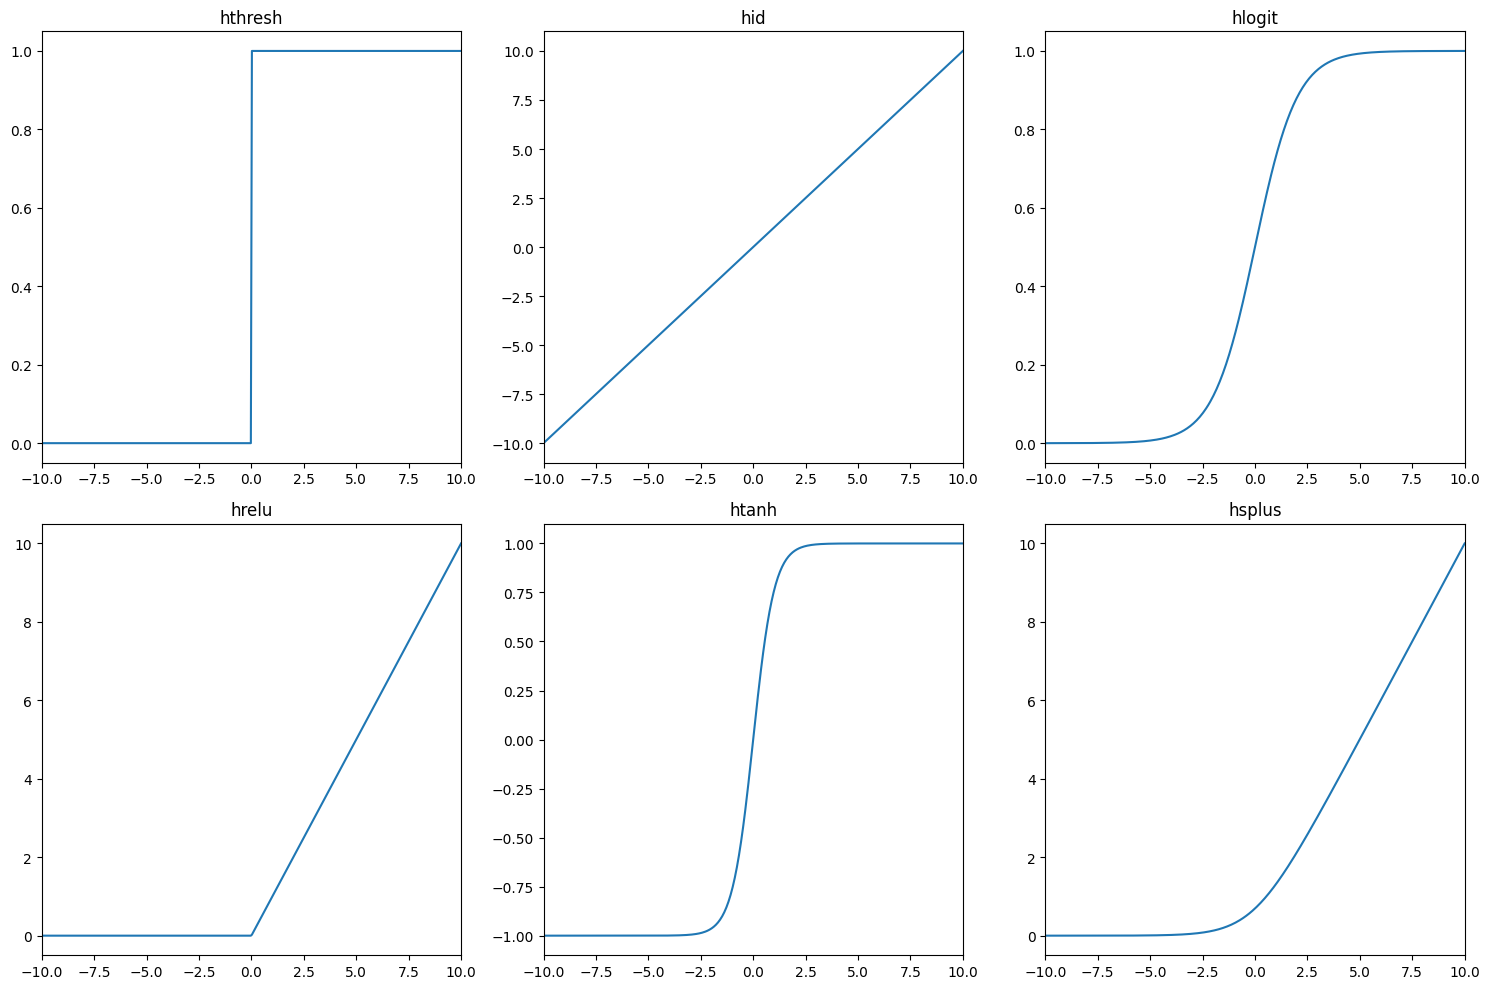

In [13]:
# Erstellen Sie ein Array von x-Werten
x = np.linspace(-10, 10, 400)

# Erstellen Sie ein 2x3-Raster von Plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Zeichnen Sie jede Funktion in einem separaten Subplot
axs[0, 0].plot(x, hthresh(x))
axs[0, 0].set_title('hthresh')
axs[0, 0].set_xlim([-10, 10])

axs[0, 1].plot(x, hid(x))
axs[0, 1].set_title('hid')
axs[0, 1].set_xlim([-10, 10])

axs[0, 2].plot(x, hlogit(x))
axs[0, 2].set_title('hlogit')
axs[0, 2].set_xlim([-10, 10])

axs[1, 0].plot(x, hrelu(x))
axs[1, 0].set_title('hrelu')
axs[1, 0].set_xlim([-10, 10])

axs[1, 1].plot(x, htanh(x))
axs[1, 1].set_title('htanh')
axs[1, 1].set_xlim([-10, 10])

axs[1, 2].plot(x, hsplus(x))
axs[1, 2].set_title('hsplus')
axs[1, 2].set_xlim([-10, 10])

# Anzeigen der Plots
plt.tight_layout()
plt.show()

> **Warum findet $h^{id}$ kaum Anwendung in neuronalen Netzen?**
>
> Die Funktion $h^{id}$ findet kaum Anwendung in neuronalen Netzen, da sie die Ausdrucksstärke des Netzes stark einschränkt.
>
> Wenn alle Neuronen im Netzwerk die Identitätsfunktion als Aktivierungsfunktion besitzen, repräsentiert das gesamte Netzwerk eine lineare Funktion, was nicht ausdrucksstärker ist als ein einzelnes Neuron.

- Die Ableitung der Aktivierungsfunktion spielt eine wichtige Rolle beim Lernen von neuronalen Netzen, da lokale Ableitungen benötigt werden, um Änderungen der Gewichte mit Methoden wie dem Gradientenabstieg zu berechnen.
- Eine wohldefinierte und informative Ableitung der Aktivierungsfunktion erleichtert den Lernprozess.
- Die Schwellwertfunktion ($h^{thresh}$) wird aufgrund ihrer Ableitung, die größtenteils null ist, kaum in praktischen Anwendungen verwendet.
- Die Funktion $h^{relu}$ (Rectified Linear Unit) wird aufgrund ihrer mathematischen Einfachheit und leicht berechenbaren Ableitung am häufigsten verwendet, obwohl auch ihre Ableitung bei $x = 0$ undefiniert ist.
- Für die Ausgabeschicht werden je nach Anwendungsfall andere Aktivierungsfunktionen gewählt.
- Für Regressionsaufgaben kann die Identitätsfunktion passend sein, da sie die gesamten reellen Zahlen als Zielmenge darstellen kann.
- Für binaäre Klassifikationsaufgaben bietet sich die Verwendung der Sigmoid-Funktion ($h^{logit}$) an.

- Bei der Mehrklassenklassifikation wird in der Ausgabeschicht üblicherweise die Softmax-Funktion angewendet, um sicherzustellen, dass alle Werte der Ausgabeschicht sich zu 1 aufsummieren.
- Die Ausgaben der vorherigen Schicht $a^{(l-1)}_1, ..., a^{(l-1)}_k$ repräsentieren typischerweise die "Stärke" der Klassifikation der einzelnen $k$ Klassen.
- Die Ausgaben der Ausgabeschicht berechnen sich dann gemäß der Softmax-Funktion: $$a^{(l)}_j = \frac{e^{a^{(l-1)}_j}}{\sum_{i=1}^k e^{a^{(l-1)}_i}}$$ für alle $j = 1, ..., k.$
- Die Summe aller Ausgaben der Ausgabeschicht ist gleich 1: $$a^{(l)}_1 + ... + a^{(l)}_k = 1$$

## 5.1.4. Backpropagation <a name="5_1_4"></a>
---

##### ANN für ein binäres Klassifikationsproblem:

- Es wird die Architektur eines neuronalen Netzwerks (ANN) betrachtet, das für ein binäres Klassifikationsproblem verwendet wird. Der Datensatz D besteht aus Eingabe- und Zielwertpaaren $D = \{(x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)})\}$, wobei die Zielwerte binär sind $y^{(1)}, \ldots, y^{(m)} \in \{0,1\}$.
- Die logistische Kostenfunktion $L^{logit}$ wird für das Lernproblem verwendet: $$L^{\text{logit}}(D, f) = -\sum_{i=1}^{m} y^{(i)} \log f(x^{(i)}) + (1 - y^{(i)}) \log (1 - f(x^{(i)}))$$

- Die Kostenfunktion kann durch den logistischen Einzelkostenwert $cost_{L^{logit}}$ vereinfacht werden: $$\text{cost}_{L^{\text{logit}}}(y, y') = -y \log y' - (1 - y) \log (1 - y')$$ <a name=cost></a>
- Vereinfacht heißt es: $$L^{\text{logit}}(D, f) = \sum_{i=1}^{m} \text{cost}_{L^{\text{logit}}}(y^{(i)}, f(x^{(i)}))$$

- Andere Kostenfunktionen können je nach Architektur und Problemstellung verwendet werden, jedoch bleibt der Zusammenhang zwischen Gesamtkostenfunktion und Einzelkostenwerten ähnlich.
- Das Ziel des Lernprozesses ist es, die Gewichte W so anzupassen, dass das neuronale Netzwerk optimal an den Datensatz angepasst ist. Eine mögliche Methode zur Optimierung der Gewichte nennt sich **Gradient Descent**.

####  Backpropagation-Algorithmus
- Der Backpropagation-Algorithmus wird eingeführt, um die partiellen Ableitungen der Kostenfunktion nach den Gewichten zu berechnen.
- Die Vorwärts- und Rückwärtspropagationsschritte des Backpropagation-Algorithmus werden erklärt.
- Die Berechnung der partiellen Ableitungen für einzelne Gewichte wird durch die Anwendung der Kettenregel und dynamischen Programmierung vereinfacht.

Der Backpropagation-Algorithmus besteht aus zwei Hauptphasen: der Vorwärtspropagation und der Rückwärtspropagation. Hier sind die Schritte für jede Phase klar dargestellt:

1. **Vorwärtspropagation**:
    - Berechnen Sie die linearen Anteile $$z^{(1)} = W^{(0)}x$$ und die Aktivierungswerte $$a^{(1)} = act(z^{(1)})$$ der ersten Schicht.
    - Propagieren Sie die Werte durch das gesamte Netzwerk bis zur Ausgabeschicht, d.h., berechnen Sie $$z^{(i)} = W^{(i-1)}a^{(i-1)}$$ und $$a^{(i)} = act(z^{(i)})$$ für alle $i = 2,...,l$.

2. **Rückwärtspropagation**:
    - Beginnen Sie mit der Berechnung von $$\delta(z^{(l)}_1) = \frac{\partial cost(y,\phi_W(x))}{\partial z^{(l)}_1}$$
    - Für die Neuronen der versteckten Schichten, berechnen Sie $$\delta(z^{(k)}_j) = act'(z^{(k)}_j)\sum_{i=1}^{n_{k+1}}\delta(z^{(k+1)}_i)W^{(k)}_{i,j}$$ für $k = 1,...,l-1$ und $j = 1,...,n_k$.


.

3. **Berechnung der partiellen Ableitungen**:
    
    1. Die Fehlerwerte der Gewichte durch die partiellen Ableitungen können dann berechnet werden als $$\frac{\partial cost(y,\phi_W(x))}{\partial W^{(k)}_{i,j}} = \delta(z^{(k+1)}_i)a^{(k)}_j \tag{1}$$<a name=delta1>
      wobei $\delta(z^{(k+1)}_i)$ wird berechnet durch: $$\delta(z^{(k)}_j) = \frac{\partial cost(y,\phi_W(x))}{\partial z^{(k)}_{j}} \\
= act'(z^{(k)}_j) \sum_{i=1}^{n_{k+1}} \delta(z^{(k+1)}_i) W^{(k)}_{i, j} \tag{2}$$ <a name=delta2></a>

       >In einem künstlichen neuronalen Netzwerk (ANN), das die logistische Kostenfunktion $L_{logit}$ und die logistische Aktivierungsfunktion $h_{logit}$ in der **Ausgabeschicht** verwendet, ist der Fehler $δ$ für jedes Neuron $z^{(l)}_i$ in der Ausgabeschicht gegeben durch:
       $$\delta^{(l)}_i = a^{(l)}_i - y_i$$

Diese Schritte werden für alle Beispiele in Ihrem Datensatz wiederholt und die resultierenden partiellen Ableitungen werden verwendet, um die Gewichte in Ihrem neuronalen Netzwerk zu aktualisieren. Dieser Prozess wird so lange wiederholt, bis ein bestimmtes Abbruchkriterium erfüllt ist, z.B. eine maximale Anzahl von Iterationen oder eine minimale Verbesserung der Kostenfunktion. 

Wir schauen uns nun die obigen Berechnungen einmal an einem konkreten Beispiel an.


#### **Beispiel 2.** Backpropagation-Algorithmus <a name="b2"></a>

Wir betrachten das Netzwerk in Abbildung 8.

![abbildung8](./abbildung8.PNG)

Es gilt

$$
W^{(0)} = \begin{pmatrix} W^{(0)}_{1,0} & W^{(0)}_{1,1} & W^{(0)}_{1,2} \\ W^{(0)}_{2,0} & W^{(0)}_{2,1} & W^{(0)}_{2,2} \end{pmatrix}, \quad W^{(1)} = \begin{pmatrix} W^{(1)}_{1,0} & W^{(1)}_{1,1} & W^{(1)}_{1,2} \\ W^{(1)}_{2,0} & W^{(1)}_{2,1} & W^{(1)}_{2,2} \end{pmatrix}, \quad W^{(2)} = \begin{pmatrix} W^{(2)}_{1,0} & W^{(2)}_{1,1} & W^{(2)}_{1,2} \end{pmatrix}
$$

und $W = \{W^{(0)}, W^{(1)}, W^{(2)}\}$. 
>Für die Anwendung im Sinne von Gleichung (4) schreiben wir $W$ auch als Vektor $W = (W^{(0)}_{1,0}, W^{(0)}_{1,1}, W^{(0)}_{1,2}, W^{(0)}_{2,0}, \ldots, W^{(2)}_{1,2})^T$.

Wir nehmen folgende initiale Gewichte an:

$$
W^{(0)} = \begin{pmatrix} 2 & -1 & -1 \\ 0 & 1 & -1 \end{pmatrix}, \quad W^{(1)} = \begin{pmatrix} 3 & -2 & -1 \\ 2 & -1 & 1 \end{pmatrix}, \quad W^{(2)} = \begin{pmatrix} 1 & 1 & -3 \end{pmatrix}
$$

Weiterhin sei die Aktivierungsfunktion für alle Neuronen des Netzes die Sigmoid-Funktion $h^{\text{logit}}$ und die Kostenfunktion sei $L° {\text{logit}}$.

Sei ein Beispiel $(x, y)$ gegeben durch $$x = (x_0, x_1, x_2)^T = (1,2,-1)^T \qquad \qquad \qquad y = 1$$

#### Lösung

1. Für die Vorwärtspropagation berechnen wir zunächst den linearen Anteil $z^{(1)}$ und den Aktivierungswert $a^{(1)}$ der ersten Schicht

$$
z^{(1)} = W^{(0)}x = \begin{pmatrix} 2 & -1 & -1 \\ 0 & 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 2 \\ -1 \end{pmatrix} = \begin{pmatrix} 1 \\ 3 \end{pmatrix}$$
$$a^{(1)} = h_{\text{logit}}(z^{(1)}) = \begin{pmatrix} h_{\text{logit}}(1) \\ h_{\text{logit}}(3) \end{pmatrix} = \begin{pmatrix} \frac{1}{1 + e^{-1}} \\ \frac{1}{1 + e^{-3}} \end{pmatrix} \approx \begin{pmatrix} 0.731 \\ 0.953 \end{pmatrix}$$

Wir ergänzen nun zunächst bei $a^{(1)}$ den Bias und schreiben $a^{(1)} = (1,0.731,0.953)^T$. 

In [33]:
matrix1= np.array([[2, -1, -1], 
                   [0, 1, -1]])
matrix2 = np.array([1,2,-1])
z1 = multiply_matrix(matrix1, matrix2)

[1 3]


In [34]:
a1 = list(map(hlogit, z1))
a1

[0.731, 0.953]

In [35]:
a1.insert(0, 1)
a1

[1, 0.731, 0.953]

2. Nun evaluieren wir die nächste Schicht:

$$
z^{(2)} = W^{(1)}a^{(1)} = \begin{pmatrix} 3 & -2 & -1 \\ 2 & -1 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0.731 \\ 0.953 \end{pmatrix} = \begin{pmatrix} 0.585 \\ 2.222 \end{pmatrix}$$
$$a^{(2)} = h_{\text{logit}}(z^{(2)}) = \begin{pmatrix} h_{\text{logit}}(0.585) \\ h_{\text{logit}}(2.222) \end{pmatrix} \approx \begin{pmatrix} 0.642 \\ 0.902 \end{pmatrix}$$

Wir ergänzen nun zunächst bei $a^{(2)}$ den Bias und schreiben $a^{(2)} = (1,0.642,0.902)^T$. 

In [36]:
matrix1= np.array([[3, -2, -1], 
                   [2, -1, 1]])
z2 = multiply_matrix(matrix1, np.array(a1))
a2 = list(map(hlogit, z2))
print(a2)
a2.insert(0, 1)
a2

[0.585 2.222]
[0.642, 0.902]


[1, 0.642, 0.902]

3. Wir evaluieren nun die Ausgabeschicht $a^3$:

$$z^{(3)} = W^{(2)}a^{(2)} = \begin{pmatrix} 1 & 1 & -3 \end{pmatrix} \begin{pmatrix} 1 \\ 0.642 \\ 0.902 \end{pmatrix} = \begin{pmatrix} -1.064 \end{pmatrix}$$
$$a^{(3)} = h_{\text{logit}}(z^{(3)}) = \begin{pmatrix} h_{\text{logit}}(-1.064) \end{pmatrix} \approx \begin{pmatrix} 0.257 \end{pmatrix}$$

In [38]:
matrix1= np.array([1, 1, -3])
z3 = multiply_matrix(matrix1, np.array(a2))
a3 = list(map(hlogit, z3))
print(a3)

-1.064
[0.257]


4. **Berechnung des Einzelkostenwerts**: Für unser Beispiel ($x$, $y$) und unser aktuelles Netz erhalten wir folgenden Einzelkostenwert von der [Kostenfunktion $cost_L^{logit}$](#cost):
$$\text{cost}_{L_{\text{logit}}}(y,a^{(3)}_1) = -y \cdot \log(a^{(3)}_1) - (1 - y) \cdot \log(1 - a^{(3)}_1)$$

$$ = \text{cost}_{L_{\text{logit}}}(1,0.257) \approx 1.359$$

In [44]:
print(round(logit_cost(1, a3[0]), 3))  # Should print: 1.359

1.359


5. **Berechnung der Fehlerwerte $\delta$ an den einzelnen Neuronen**:
    - Beginnen Sie mit der Ausgabeschicht. Nach (9) gilt: 
        - $$\delta(z^{(3)}_1) = \frac{\partial \text{cost}_{L_{\text{logit}}}(y,\phi_W(x))}{\partial z^{(3)}_1} = \frac{\partial \text{cost}_{L_{\text{logit}}}(y,a^{(3)}_1)}{\partial z^{(3)}_1} = \frac{\partial (-y \log h_{\text{logit}}(z^{(3)}_1)-(1-y)\log(1-h_{\text{logit}}(z^{(3)}_1)))}{\partial z^{(3)}_1}$$

     -  In einem künstlichen neuronalen Netzwerk (ANN), das die logistische Kostenfunktion $L_{logit}$ und die logistische Aktivierungsfunktion $h_{logit}$ in der Ausgabeschicht verwendet, ist der Fehler $δ$ für jedes Neuron $z^{(l)}_i$ in der Ausgabeschicht gegeben durch:
       $$\delta^{(l)}_i = a^{(l)}_i - y_i$$
D.h.
$$
\begin{align*}
&= h^{logit}(z^{(3)}_1) - y \\
&= a^{(3)}_1 - y \\
&= 0.257 - 1 = -0.743
\end{align*}
$$

In [48]:
delta3 = a3[0] - 1
delta3

-0.743

Wir berechnen nun die Fehlerwerte der letzten versteckten Schicht. Nach [<ins>Gleichungen (1) und (2)</ins>](#delta1) gilt $$\frac{\partial cost(y,\phi_W(x))}{\partial W^{(k)}_{i,j}} = \delta(z^{(k+1)}_i)a^{(k)}_j $$

$$\delta(z^{(k)}_j) = \frac{\partial cost(y,\phi_W(x))}{\partial z^{(k)}_{j}} \\
= act'(z^{(k)}_j) \sum_{i=1}^{n_{k+1}} \delta(z^{(k+1)}_i) W^{(k)}_{i, j}$$

   >- Beachten Sie, dass die Ableitung der Sigmoid-Funktion gegeben ist durch $$(h_{\text{logit}})'(x) = h_{\text{logit}}(x)(1-h_{\text{logit}}(x))$$

Für $\delta(z^{(2)}_1)$   
$$
\begin{align*}
\delta(z^{(2)}_1 &= (h^{logit})'(z^{(2)}_1) \delta(z^{(3)}_1) W^{(2)}_{1,1} \\
&= h^{logit}(z^{(2)}_1)(1 - h^{logit}(z^{(2)}_1)) \delta(z^{(3)}_1) W^{(2)}_{1,1} \qquad \text{und wegen} \qquad a^{(i)} = act(z^{(i)}) \\
&= a^{(2)}_1 (1 - a^{(2)}_1) \delta(z^{(3)}_1) W^{(2)}_{ ,1} \\
&= 0.642(1 - 0.642) \cdot (-0.743) \cdot 1 \\
&\approx -0.171
\end{align*}
$$

und analog

$$
\begin{align*}
\delta(z^{(2)}_2) &= a^{(2)}_2 (1 - a^{(2)}_2) \delta(z^{(3)}_1) W^{(2)}_{1,2} \\
&= 0.902(1 - 0.902) \cdot (-0.743) \cdot (-3) \\
&\approx 0.197
\end{align*}
$$

Für die erste versteckte Schicht erhalten wir nun:

$$
\begin{align*}
\delta(z^{(1)}_1) &= (h^{logit})'(z^{(1)}_1) \left( \delta(z^{(2)}_1) W^{(1)}_{1,1} + \delta(z^{(2)}_2) W^{(1)}_{2,1} \right) \\
&= a^{(1)}_1 (1 - a^{(1)}_1) \left( \delta(z^{(2)}_1) W^{(1)}_{1,1} + \delta(z^{(2)}_2) W^{(1)}_{2,1} \right) \\
&= 0.731(1 - 0.731) \left[ -0.171 \cdot (-2) + 0.197 \cdot (-1) \right] \\
&\approx 0.029
\end{align*}
$$

und analog

$$
\begin{align*}
\delta(z^{(1)}_2) &= a^{(1)}_2 (1 - a^{(1)}_2) \left( \delta(z^{(2)}_1) W^{(1)}_{1,2} + \delta(z^{(2)}_2) W^{(1)}_{2,2} \right) \\
&= 0.953(1 - 0.953) \left[ -0.171 \cdot (-1) + 0.197 \cdot 1 \right] \\
&\approx 0.017
\end{align*}
$$

Schließlich können wir nach (12) die Ableitungen der einzelnen Gewichte berechnen, beispielsweise:

$$
\frac{\partial \text{cost}_{L_{logit}}(y, \phi_W(x))}{\partial W^{(1)}_{2,1}} = \delta(z^{(2)}_2) a^{(1)}_1 = 0.197 \cdot 0.731 \approx 0.144
$$

Beachten Sie, dass für die Gewichte der Eingabeschicht der Vektor $a^{(0)}$ der Eingabe $x$ entspricht, also beispielsweise:

$$
\frac{\partial \text{cost}_{L_{logit}}(y, \phi_W(x))}{\partial W^{(0)}_{1,2}} = \delta(z^{(1)}_1) a^{(0)}_2 = \delta(z^{(1)}_1) x_2 \approx -0.029
$$

Ist $(x, y)$ unser einziges Beispiel (also $D = \{(x, y)\}$), so gilt $L_{logit}(D,\phi_W) = \text{cost}_{L_{logit}}(y,\phi_W(x))$ und wir könnten nun die Gewichte anhand von (4) aktualisieren. Wäre beispielsweise $\gamma = 0.1$ unsere Lernrate, so berechnen wir den neuen Wert von Gewicht $W^{(0)}_{1,2}$ zu

$$
(W^{(0)}_{1,2})_{\text{neu}} := W^{(0)}_{1,2} - \gamma \frac{\partial L_{logit}(D,\phi_W)}{\partial W^{(0)}_{1,2}} = W^{(0)}_{1,2} - \gamma \frac{\partial \text{cost}_{L_{logit}}(y,\phi_W(x))}{\partial W^{(0)}_{1,2}} = -1 - 0.1 \cdot (-0.029) \approx -0.997
$$

Üblicherweise besitzt der Datensatz $D$ mehr als nur ein Beispiel und wir können mithilfe von (6) die einzelnen partiellen Ableitungen bezüglich der einzelnen Beispiele aufsummieren, bevor wir einen einzelnen Schritt beim Gradient Descent unternehmen. Algorithmus 1 zeigt den gesamten Backpropagation-Algorithmus zur Bestimmung der partiellen Ableitungen (5), die dort mit $D^{(k)}_{i, j}$ bezeichnet werden.

![formel4](formel4.PNG)
![formel6](formel6.PNG)


## 5.1.5. Praktische Probleme beim Lernen <a name="5_1_5"></a>
---



#### Herausforderungen beim Training von neuronalen Netzwerken:

1. **Langsame Berechnung bei großen Datensätzen**:
   - Klassische Gradientenabstiegsverfahren wie Gradient Descent können bei großen Datensätzen lange dauern, da der Gradient über den gesamten Datensatz berechnet 
   - Gradientenabstiegsverfahren (Gradient Descent) ist ein 
Klassischer Ansatz zur Aktualisierung der Gewichte im neuronalen Netzwerk.wird.

2. **Fluktuation der Kostenfunktion und mangelnde Zielausrichtung**:
   - Der stochastische Gradientenabstieg (SGD) aktualisiert die Gewichte mit nur einem zufällig ausgewählten Beispiel pro Iteration, was zu einer starken Fluktuation der Kosten und einer mangelnden Zielausrichtung führen kann.

3. **Verschwindende oder explodierende Gradienten**:
   - Die Wahl der Aktivierungsfunktion kann zu Problemen wie dem Verschwinden oder Explodieren von Gradienten führen, insbesondere bei mehreren Schichten und großen oder kleinen Ein#gaben.

### Lösungen und Ansätze:

1. **Mini-Batch-Gradientenabstieg (MBGD)**:
   - MBGD ist ein Kompromiss zwischen Gradient Descent und SGD.
   - Es verwendet eine kleine Teilmenge des Datensatzes für jede Iteration, was die Rechenzeit im Vergleich zu Gradient Descent reduziert und gleichzeitig die Fluktuationen im Vergleich zu SGD verringert.

2. **Verwendung geeigneter Aktivierungsfunktionen**:
   - Vermeiden von Aktivierungsfunktionen, deren Ableitung an den meisten Stellen null ist, wie z.B. Schwellwertfunktionen.
   - Verwenden von Aktivierungsfunktionen wie ReLU, die das Problem des verschwindenden oder explodierenden Gradienten vermeiden.
   - Alternativen wie Leaky-ReLU können eine positive Ableitung für alle Eingaben bieten, um das Problem der verschwindenden Gradienten bei negativusforderungen zu begegnen.

---
<a name="up"></a>**`[Go Up!^](#up)**

##### Sources:

(1) Why does Q-Learning use epsilon-greedy during testing?. https://stats.stackexchange.com/questions/270618/why-does-q-learning-use-epsilon-greedy-during-testing.
(2) Epsilon-Greedy Q-learning | Baeldung on Computer Science. https://www.baeldung.com/cs/epsilon-greedy-q-learning.
(3) Epsilon and learning rate decay in epsilon greedy q learning. https://stackoverflow.com/questions/53198503/epsilon-and-learning-rate-decay-in-epsilon-greedy-q-learning.
(4) Exploration in Q learning: Epsilon greedy vs Exploration function. https://datascience.stackexchange.com/questions/94029/exploration-in-q-learning-epsilon-greedy-vs-exploration-function.